### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Checking and updating libraries versions

In [2]:
matplotlib.__version__

'3.3.2'

### importing dataset

In [5]:
path = r"C:\Users\dioog\02. Bloomberg Analysis"

In [6]:
# naming the dataframe simply as "df", as this is the only dataset in this project. Subsets of this data frame will natuarally have distinctive names.

df = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_orig_checked.csv"))

In [7]:
df.head()

,Unnamed: 0,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,Best Analyst Rating,...,03/02/2020,02/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020
0,0,AAPL US Equity,APPLE INC,2.045317e+12,1.0,Technology,NASDAQ GS,UNITED STATES,US,4.116279,...,77.17,74.70,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77
1,1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887799e+12,2.0,Energy,Saudi Arabia,SAUDI ARABIA,SA,2.777778,...,9.05,8.74,8.13,8.42,8.76,8.72,8.80,9.40,9.53,9.12
2,2,MSFT US Equity,MICROSOFT CORP,1.642367e+12,3.0,Technology,NASDAQ GS,UNITED STATES,US,4.789474,...,174.38,172.79,152.11,174.57,182.83,204.70,216.54,227.27,212.46,202.33
3,3,AMZN US Equity,AMAZON.COM INC,1.571013e+12,4.0,Communications,NASDAQ GS,UNITED STATES,US,4.892857,...,2004.20,1953.95,1907.70,2286.04,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48
4,4,GOOGL US Equity,ALPHABET INC-A,1.202594e+12,5.0,Communications,NASDAQ GS,UNITED STATES,US,4.772727,...,1482.60,1386.32,1102.10,1317.32,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32


In [8]:
df.shape

(4937, 27)

In [9]:
df.columns

Index(['Unnamed: 0', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '02/12/2019',
       '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020',
       '02/11/2020'],
      dtype='object')

### Creating a correlation matrix heatmap (colored)

#### creating new variable

In [10]:
# I decided to start by creating a variable I predict will show some correlation with some of the variables in dataset.

# New variable: ratio between "the difference between 52Wk High price and 52Wk Low price" and "average_52wk_price"

df["ratio_yearvar_meanprice"] = (df["52Wk High"] - df["52Wk Low"])/(df[['02/12/2019','01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020','02/11/2020']].mean(axis=1))

In [11]:
df["ratio_yearvar_meanprice"]

0       0.956738
1       0.384372
2       0.540618
3       0.771315
4       0.568911
          ...   
4932    1.287600
4933    0.489247
4934    0.175656
4935    0.096440
4936    1.276870
Name: ratio_yearvar_meanprice, Length: 4937, dtype: float64

In [12]:
df["ratio_yearvar_meanprice"].describe()

count    4935.000000
mean             inf
std              NaN
min         0.000000
25%         0.522930
50%         0.692846
75%         0.945629
max              inf
Name: ratio_yearvar_meanprice, dtype: float64

In [13]:
# Create a correlation matrix using pandas

df.corr()

,Unnamed: 0,Market Cap,Rank(Current Market Cap),Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),02/12/2019,01/01/2020,03/02/2020,02/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020,ratio_yearvar_meanprice
Unnamed: 0,1.000000,-0.330042,0.999993,-0.031261,-0.031534,-0.030200,-0.018029,-0.029621,-0.029722,-0.030028,-0.029947,-0.030649,-0.031131,-0.031662,-0.032115,-0.031918,-0.031705,-0.031773,-0.031717,0.062030
Market Cap,-0.330042,1.000000,-0.329339,0.035215,0.116678,0.114484,0.019853,0.114291,0.114328,0.114222,0.114497,0.113254,0.114638,0.114873,0.115651,0.116528,0.117075,0.116456,0.116339,-0.036918
Rank(Current Market Cap),0.999993,-0.329339,1.000000,-0.031305,-0.031455,-0.030123,-0.018054,-0.029544,-0.029646,-0.029951,-0.029870,-0.030573,-0.031054,-0.031585,-0.032037,-0.031839,-0.031627,-0.031695,-0.031639,0.061913
Best Analyst Rating,-0.031261,0.035215,-0.031305,1.000000,0.000587,-0.000198,0.102906,0.000446,0.000495,0.000328,0.000334,-0.000741,-0.000318,-0.000526,-0.000702,0.000174,0.000622,0.000453,0.000287,0.159891
52Wk High,-0.031534,0.116678,-0.031455,0.000587,1.000000,0.999791,-0.003761,0.999813,0.999853,0.999915,0.999916,0.998682,0.999417,0.999189,0.999075,0.999869,0.999902,0.999882,0.999848,-0.014665
52Wk Low,-0.030200,0.114484,-0.030123,-0.000198,0.999791,1.000000,-0.005561,0.999655,0.999723,0.999879,0.999834,0.999066,0.999643,0.999405,0.999272,0.999881,0.999849,0.999894,0.999883,-0.016338
1Y Tot Ret (%),-0.018029,0.019853,-0.018054,0.102906,-0.003761,-0.005561,1.000000,-0.006267,-0.006153,-0.006057,-0.005824,-0.005647,-0.005379,-0.005081,-0.004722,-0.004014,-0.003729,-0.003764,-0.003782,0.372237
02/12/2019,-0.029621,0.114291,-0.029544,0.000446,0.999813,0.999655,-0.006267,1.000000,0.999989,0.999829,0.999943,0.997939,0.998890,0.998525,0.998332,0.999571,0.999755,0.999613,0.999559,-0.016610
01/01/2020,-0.029722,0.114328,-0.029646,0.000495,0.999853,0.999723,-0.006153,0.999989,1.000000,0.999871,0.999963,0.998111,0.999021,0.998680,0.998492,0.999659,0.999820,0.999695,0.999646,-0.016584
03/02/2020,-0.030028,0.114222,-0.029951,0.000328,0.999915,0.999879,-0.006057,0.999829,0.999871,1.000000,0.999955,0.998932,0.999567,0.999334,0.999193,0.999844,0.999838,0.999861,0.999843,-0.016764


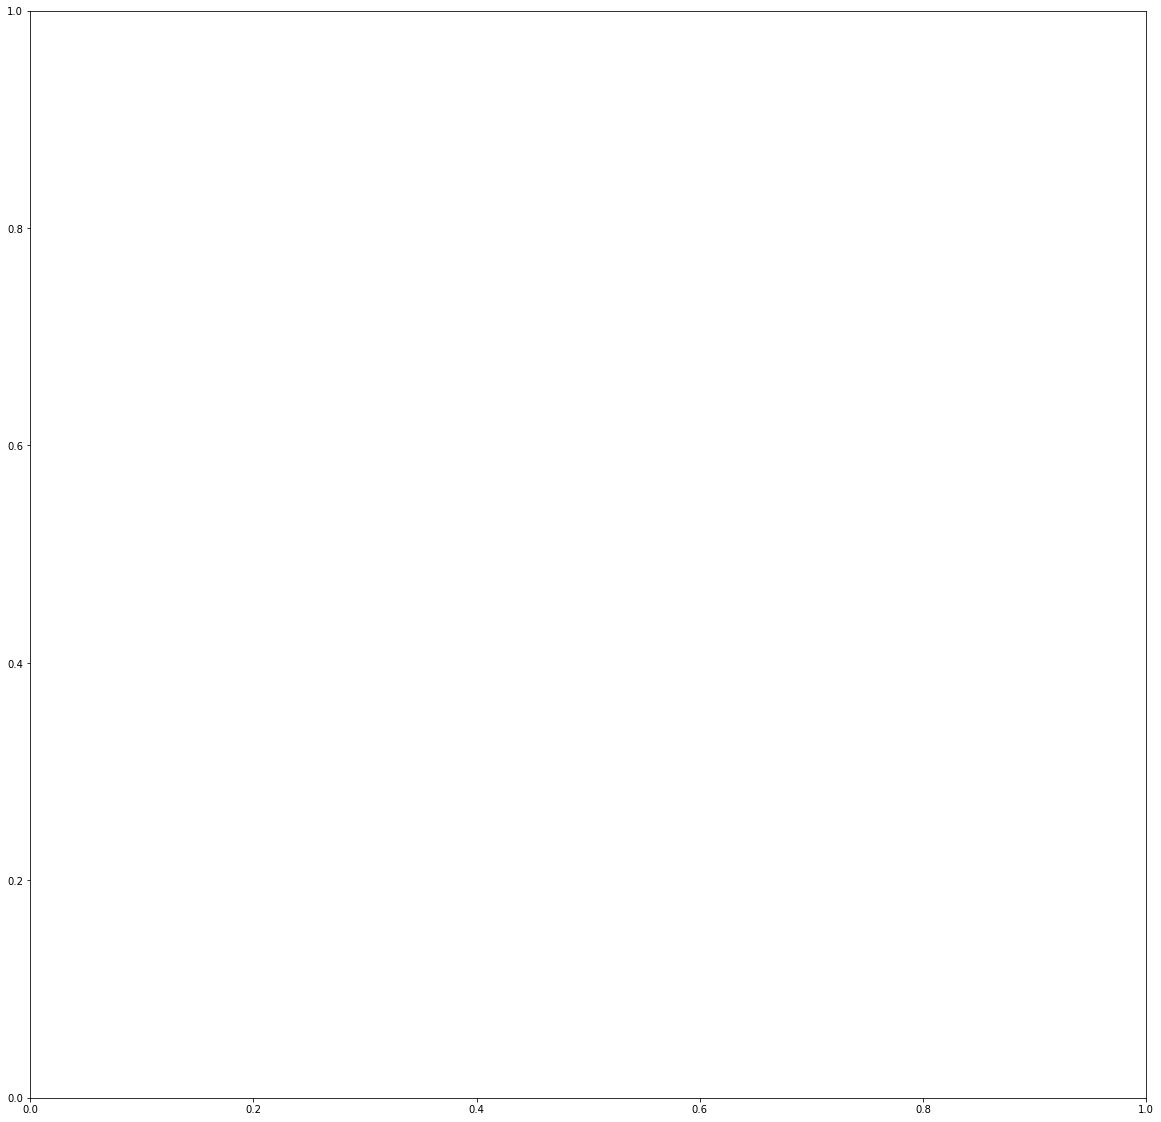

In [14]:
# Creating a subplot with matplotlib. 

f,ax = plt.subplots(figsize=(20,20))

In [15]:
# Creating the correlation heatmap in seaborn.

corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

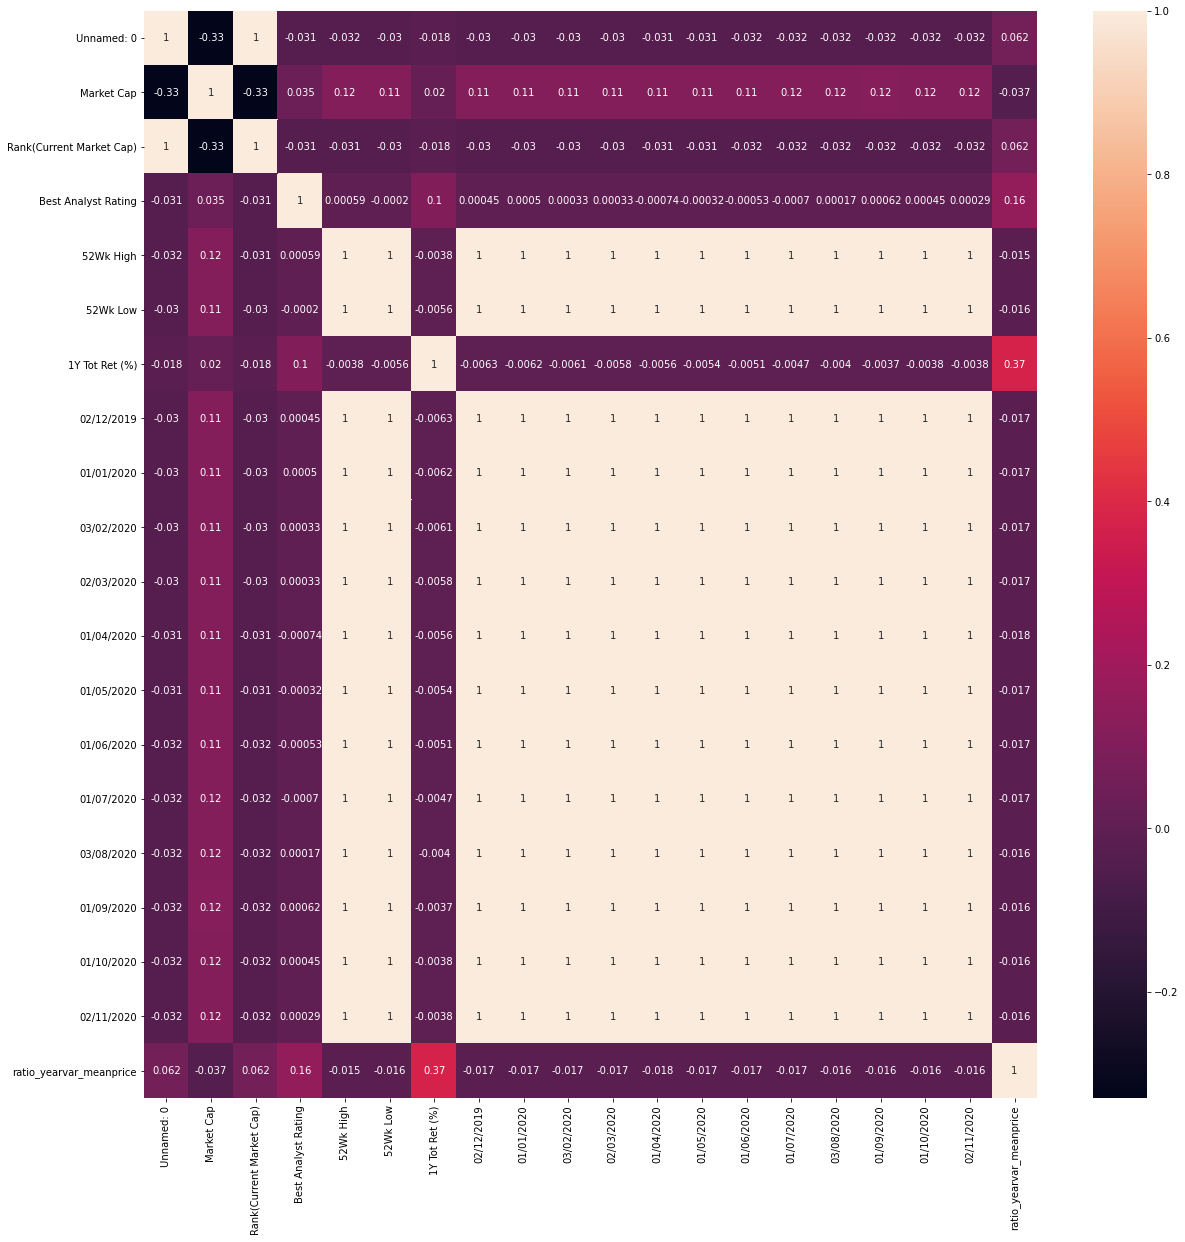

In [14]:
corr.figure

In [16]:
# Creating a subset excluding share's prices, rank and "Unnamed: 0"

sub = df[['Market Cap', 'Best Analyst Rating', '52Wk High', '52Wk Low', '1Y Tot Ret (%)' , 'ratio_yearvar_meanprice']]

In [17]:
sub

,Market Cap,Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),ratio_yearvar_meanprice
0,2.045317e+12,4.116279,137.98,53.15,79.75,0.956738
1,1.887799e+12,2.777778,10.32,7.18,0.00,0.384372
2,1.642367e+12,4.789474,232.86,132.52,43.23,0.540618
3,1.571013e+12,4.892857,3552.25,1626.03,77.83,0.771315
4,1.202594e+12,4.772727,1816.89,1008.87,33.98,0.568911
...,...,...,...,...,...,...
4932,2.757690e+09,0.000000,16.05,5.32,-37.81,1.287600
4933,2.755676e+09,0.000000,35.45,20.34,7.36,0.489247
4934,2.755527e+09,0.000000,27.18,22.52,4.05,0.175656
4935,2.752932e+09,0.000000,50.50,45.68,2.99,0.096440


In [18]:
# Create a correlation matrix for sub using pandas

sub.corr()

,Market Cap,Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),ratio_yearvar_meanprice
Market Cap,1.000000,0.035215,0.116678,0.114484,0.019853,-0.036918
Best Analyst Rating,0.035215,1.000000,0.000587,-0.000198,0.102906,0.159891
52Wk High,0.116678,0.000587,1.000000,0.999791,-0.003761,-0.014665
52Wk Low,0.114484,-0.000198,0.999791,1.000000,-0.005561,-0.016338
1Y Tot Ret (%),0.019853,0.102906,-0.003761,-0.005561,1.000000,0.372237
ratio_yearvar_meanprice,-0.036918,0.159891,-0.014665,-0.016338,0.372237,1.000000


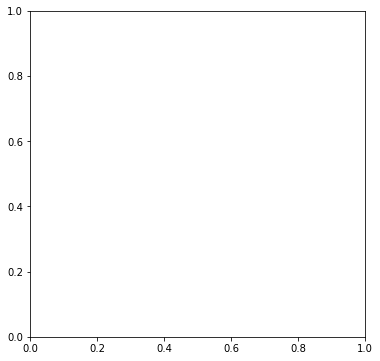

In [19]:
# Create a subplot with matplotlib. 

f,ax = plt.subplots(figsize=(6,6))

In [20]:
# Create the correlation heatmap in seaborn.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

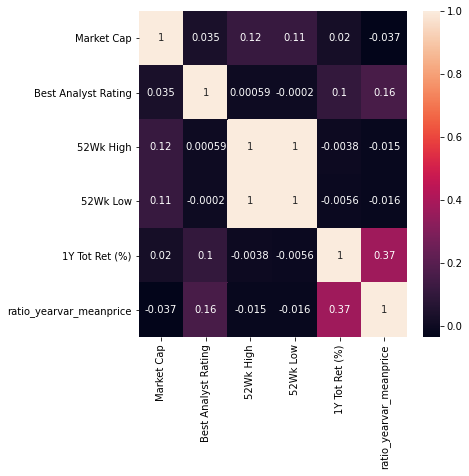

In [21]:
corr.figure

### Discussion: 

##### The heatmap covering the entire dataframe contains redundant information. Prices are bound to correlate with other prices. This was expected and is not relevant for the analysis.

##### The only variables that show a moderate correlation are "1Y Tot Ret (%)" and "ratio_yearvar_meanprice".

##### The hypothesis that might explain this relation is: the companies that experienced the biggest drop in value because of the pandemic, are also likelier to have performed worse throughout the year.

### Creating a scatterplot  for the variables with the strongest correlations 

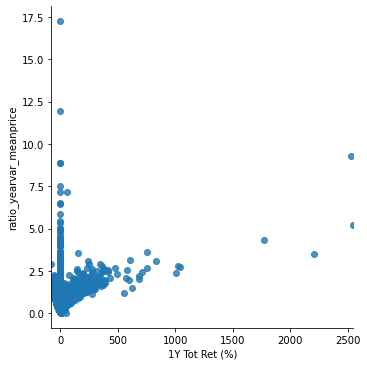

In [22]:
# Creating a scatterplot for "1Y Tot Ret (%)" and "ratio_yearvar_meanprice" columns in seaborn

sns.lmplot(x = "1Y Tot Ret (%)", y = "ratio_yearvar_meanprice", data = df)

#### Discussion:

#### This scatterplot is not very helpful because it does not distinguish between positive and negative values in "1Y Tot Ret (%)"

#### It also contains a group of companies that are listed in the stockmarket for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero. 

In [23]:
# Creating a categorical variable that splits the "1Y Tot Ret (%)" into categories positive and negative values

df.loc[df["1Y Tot Ret (%)"] < 0, "performance category"] = "neg_performers"

In [24]:
df.loc[df["1Y Tot Ret (%)"] > 0, "performance category"] = "pos_performers"

In [25]:
df.loc[df["1Y Tot Ret (%)"] == 0, "performance category"] = "no_data"

In [26]:
df["performance category"].value_counts(dropna = False)

pos_performers    3050
neg_performers    1731
no_data            156
Name: performance category, dtype: int64

In [27]:
# Creating a dataframe that excludes companies that are listed in the stockmarket for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero. 

df_exc_no_data = df[df["1Y Tot Ret (%)"] != 0]

In [29]:
df_exc_no_data.shape

(4781, 29)

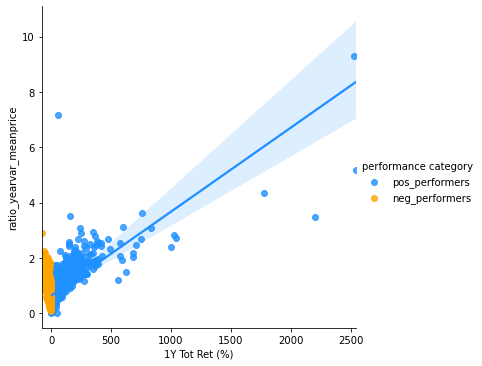

In [30]:
# Creating a scatterplot for "1Y Tot Ret (%) and "ratio_yearvar_meanprice" columns, distinguishing between negative and positive performers

sns.lmplot(x = "1Y Tot Ret (%)", y = "ratio_yearvar_meanprice", hue="performance category", data = df_exc_no_data , palette=["dodgerblue", "orange"])

#### Discussion:

##### This scatterplot is better as it distinguishes between positive and negative performers.

##### It also shows that the variance of positive performers is higher than the one from negative performers.

##### The outliers in "1Y Tot Ret (%)" make it more difficult to see a clear pattern. I will exclude them in the next step.

In [36]:
# defining ouliers

q1, q3= np.percentile(df["1Y Tot Ret (%)"],[25,75])
upper_bound = q3 +(1.5 * (q3-q1)) 
upper_bound

96.46000000000001

In [37]:
# exclusing outliers

df_no_outliers = df_exc_no_data[df_exc_no_data["1Y Tot Ret (%)"] < 96.46]

In [38]:
df_no_outliers.shape

(4402, 29)

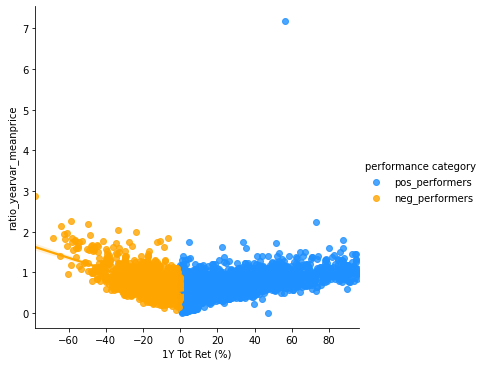

In [39]:
# recreating the scatterplot without outliers

sns.lmplot(x = "1Y Tot Ret (%)", y = "ratio_yearvar_meanprice", hue="performance category", data = df_no_outliers, palette=["dodgerblue", "orange"])

#### Discussion:

##### By excluding the outliers, the scatterplot becomes clearer.

##### A relation can now be observed in the group of companies with positive "1Y Tot Ret (%)". It suggests that companies that experienced higher drops in price tended to perform better throughout the year.  

##### But the opposite relation can be observed in the group of negative performers. Therefore, the correlation is not conclusive.

##### From another angle, better understanding the outliers, i.e. the companies that increased their value disproportionally during the pandemic, is important and will be addressed as a research question.


### Creating a pair plot 

In [40]:
# selecting variables for pair plot. 

sub_2 = sub[['Market Cap', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '1Y Tot Ret (%)']]

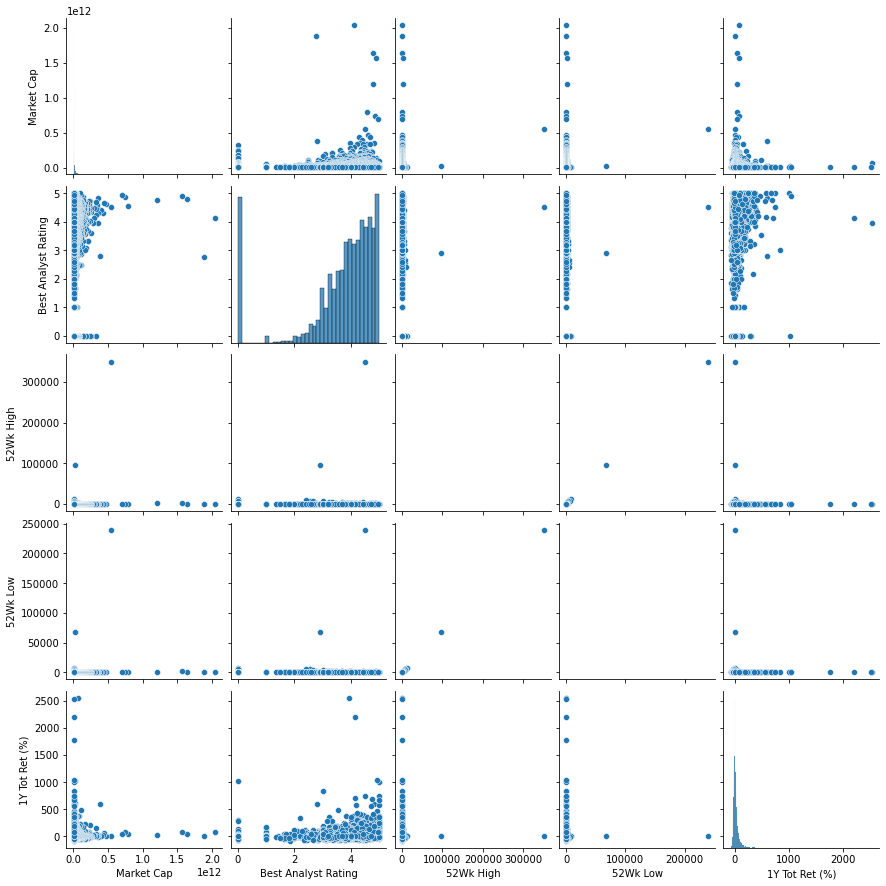

In [41]:
# Creating a pair plot 

g = sns.pairplot(sub_2)

#### Discussion:

##### The distribution of "market capitalisation" and "1Y Tot Ret" could be an interesting relation to explore to see if how the most valuable companies performed in comparison with others.

##### The distribution of "1Y Tot Ret" by sector and country is also going to be studied.

##### Unfortunately, by default, pairplots only work with numeric variables. It would be interesting to have an identical tool that included categorical variables.

##### Any suggestions Abingnue?

### Creating categorical plots

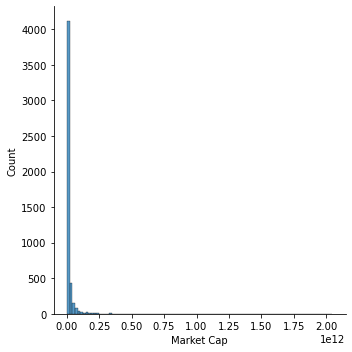

In [42]:
# Using a histogram to visualize the distribution of Market capitalisation.

sns.displot(df['Market Cap'], bins = 100)

In [43]:
df["Market Cap"].describe()

count    4.937000e+03
mean     1.912620e+10
std      6.586437e+10
min      2.751337e+09
25%      4.071396e+09
50%      6.752808e+09
75%      1.494602e+10
max      2.045317e+12
Name: Market Cap, dtype: float64

In [44]:
df.loc[df['Market Cap'] < 4000000000, 'Value category'] = 'Low Value'

In [45]:
df.loc[(df['Market Cap'] >= 4000000000) & (df['Market Cap'] < 15000000000), 'Value category'] = 'Middle Value'

In [46]:
df.loc[df['Market Cap'] >= 15000000000, 'Value category'] = 'High Value'

In [47]:
df['Value category'].value_counts(dropna = False)

Middle Value    2525
High Value      1230
Low Value       1182
Name: Value category, dtype: int64

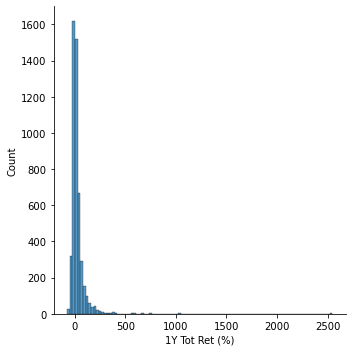

In [53]:
# Using a histogram to visualize the distribution of 1Y Tot Ret (%).

sns.displot(df["1Y Tot Ret (%)"], bins = 100)

In [49]:
df.loc[df["1Y Tot Ret (%)"] < -20, "performance category_2"] = "high_negative_performance"

In [50]:
df.loc[(df["1Y Tot Ret (%)"] >= -20) & (df["1Y Tot Ret (%)"] < 0), "performance category_2"] = "moderate_negative_performance"

In [51]:
df.loc[(df["1Y Tot Ret (%)"] > 0) & (df["1Y Tot Ret (%)"] < 20), "performance category_2"] = "moderate_positive_performance"

In [52]:
df.loc[(df["1Y Tot Ret (%)"] >= 20) & (df["1Y Tot Ret (%)"] < 100), "performance category_2"] = "high_positive_performance"

In [53]:
df.loc[df["1Y Tot Ret (%)"] >= 100, "performance category_2"] = "Very_high_positive_performance"

In [54]:
df.loc[df["1Y Tot Ret (%)"] == 0, "performance category_2"] = "no data"

In [55]:
df["performance category_2"].value_counts(dropna = False)

high_positive_performance         1413
moderate_positive_performance     1270
moderate_negative_performance     1198
high_negative_performance          533
Very_high_positive_performance     367
no data                            156
Name: performance category_2, dtype: int64

In [57]:
# Creating a dataframe that excludes companies with "1Y Tot Ret (%)" equal to zero. 

df_exc_no_data2= df[(df["1Y Tot Ret (%)"] != 0)]

In [58]:
df_exc_no_data2.shape

(4781, 31)

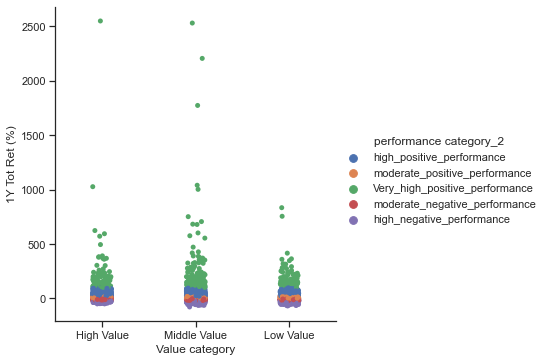

In [59]:
# Creating a categorical plot 

sns.set(style="ticks")
g = sns.catplot(x="Value category", y="1Y Tot Ret (%)", hue="performance category_2", data= df_exc_no_data2)

In [60]:
# Creating a dataframe that excludes companies with "1Y Tot Ret (%)" equal to zero and outliers. 

df_exc_no_data2_outliers= df_exc_no_data2[(df_exc_no_data2["1Y Tot Ret (%)"] < 96.46)]

In [62]:
df_exc_no_data2_outliers.shape

(4402, 31)

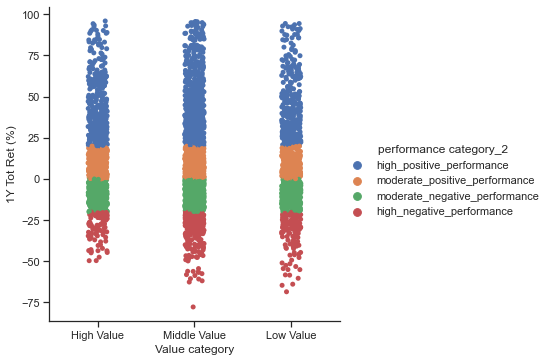

In [63]:
# reCreating a categorical plot 

sns.set(style="ticks")
g = sns.catplot(x="Value category", y="1Y Tot Ret (%)", hue="performance category_2", data= df_exc_no_data2_outliers)

#### Discussion:

##### The performance distribution of “1Y Tot Ret (%)” among the different value categories is relatively homogeneous, suggesting that market capitalization was not a determining factor for performance. 

##### Still, it is surprising to observe the amount of companies that performed "high" in the context of a global economic recession. Understand this paradox is especially important. This question will be addressed to the extend that is possible.

##### Next, I will use this tool to study the distribution of "1Y Tot Ret" by sector.


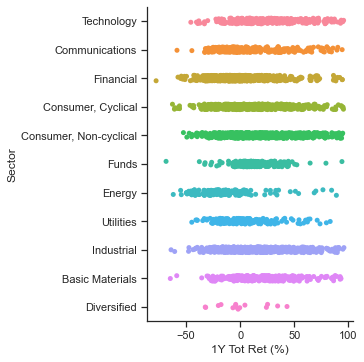

In [64]:
# Creating a categorical plot to study the distribution of "1Y Tot Ret" by sector.

sns.set(style="ticks")
g = sns.catplot(x="1Y Tot Ret (%)", y="Sector", data= df_exc_no_data2_outliers)

#### Discussion:

##### This categorical plot addresses an important question: How did different sectors performed during the COVID19 pandemic? 

##### Preliminary analysis suggests that some sectors performed worse overall: energy, utilities sectors performed worse than others. 

#### Still, some companies within these sectors performed very well. This raises new research questions.

##### In sectors such as “financial and “consumer”, performance appears to depend more on other variables than the sector itself. In these sectors there are several cases of winners and losers due to the pandemic.

##### The technology, industrial and basic material sectors tended to perform well. But again, there are exceptions that might prove interesting to research.

##### The performance outliers are mostly in the consumer cyclical sector. 


### Points 7 and 8 of the exercise were answered throughout the exercise in the discussion cells formatted as markdown.

### Exporting dataframe

In [65]:
df.to_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3.csv"))